---
title: "快速入门" 
format:
  html:
   code-fold: true
   code-tools: true
jupyter: python3
---

## Pandas 处理什么样的数据？ {.unnumbered}
大家在前面可能已经学习了python的用法，但是那些各种各样的数据该怎么用python来处理呢？或者说python跟其他像 SQL、JAVA或者R这些语言，在数据处理方面又有什么不同呢？

首先这个Pandas是Python的一个库，专门用于数据处理和分析。它提供了高性能、灵活和易于使用的数据结构，包括数据导入、清洗、转换、分析和可视化，是非常适用于处理结构化和表格化的数据。pandas在数据科学、金融分析、商业智能等领域得到广泛应用。对于不同的数据结构下面进行举例（附上相关案例链接）

::: {.callout-tip}
一个免费的[Python在线编辑器](https://onecompiler.com/python)，别等啦！快打开来试试✌️
:::

### 表格数据
Pandas最常用于处理表格数据，例如CSV文件、Excel文件、数据库查询结果等。你可以使用Pandas读取这些数据，并对其进行各种操作，如过滤、排序、合并、聚合、计算统计指标等。

当使用Pandas处理表格数据时，你可以使用DataFrame这个主要的数据结构。DataFrame是一个二维的标记数组，类似于电子表格或SQL表。

In [1]:
# 1. 导入pandas包
import pandas as pd

# 2. 假设data数据
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

# 3. 假设df，然后调用pd(pandas包)，将数据转换为DataFrame格式
df = pd.DataFrame(data)

# 4. 打印df
print(df) 



   calories  duration
0       420        50
1       380        40
2       390        45


### 时间序列数据
Pandas提供了强大的时间序列功能，可以处理日期和时间相关的数据。你可以使用Pandas对时间序列数据进行重采样、滚动计算、时间窗口分析、时间序列绘图等操作。


In [2]:
import pandas as pd

date = pd.to_datetime("13th of June, 2023")

print(date) 

2023-06-13 00:00:00


可以使用DateTimeIndex和TimedeltaIndex来表示时间索引和时间间隔。

In [11]:
import pandas as pd
# 创建一个包含日期范围的时间索引
date_range = pd.date_range(start='2023-01-01', end='2023-01-10', freq='D')

# 创建一个DataFrame，并使用时间索引
data = pd.DataFrame({'Value': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}, index=date_range)

# 查看数据的前几行
print(data.head())



            Value
2023-01-01     10
2023-01-02     20
2023-01-03     30
2023-01-04     40
2023-01-05     50


In [4]:

# 通过日期索引获取某一天的数据
day_data = data.loc['2023-01-05']

# 通过日期范围索引获取一段时间内的数据
range_data = data.loc['2023-01-03':'2023-01-07']

# 使用日期的年、月、日等属性进行切片
year_data = data[data.index.year == 2023]
month_data = data[data.index.month == 1]
day_data = data[data.index.day == 5]

# 将数据按周进行重采样，计算每周的平均值
weekly_data = data.resample('W').mean()

# 将数据按月进行重采样，计算每月的总和
monthly_data = data.resample('M').sum()

### 缺失数据处理
Pandas提供了灵活的方法来处理缺失数据。你可以使用Pandas来检测和处理缺失值，填充缺失数据，或者根据缺失值进行数据筛选和计算。


In [ ]:
# 创建带有缺失数据的DataFrame
data = pd.DataFrame({'A': [1, 2, None, 4, 5],
                     'B': [None, 2, 3, None, 6],

                     'C': [1, 2, 3, 4, 5]})

In [8]:
# 检测每个单元格是否为缺失值
missing_values = data.isnull()

# 统计每列的缺失值数量
missing_counts = data.isnull().sum()

# 统计整个DataFrame的缺失值数量
total_missing_count = data.isnull().sum().sum()

In [ ]:
# 删除包含缺失值的行
data_dropna = data.dropna()

# 删除全部为缺失值的列
data_dropna_cols = data.dropna(axis=1, how='all')

# 填充缺失值为指定的常数
data_fillna = data.fillna(0)

# 使用缺失值前面的值进行前向填充
data_ffill = data.fillna(method='ffill')

# 使用缺失值后面的值进行后向填充
data_bfill = data.fillna(method='bfill')


### 数据清洗和转换
Pandas可以用于数据清洗和转换的各种操作。你可以使用Pandas对数据进行重塑、合并、分组、变形等，以满足特定的分析需求。


In [ ]:
# 创建原始数据
data = pd.DataFrame({'Name': ['John', 'Emily', 'Michael', 'Emma'],
                     'Age': [25, 30, 35, 28],
                     'Gender': ['M', 'F', 'M', 'F'],
                     'Salary': ['$5000', '$6000', '$4500', '$7000']})

In [ ]:
# 去除重复的行
data_cleaned = data.drop_duplicates()

# 去除列中的空格
data_cleaned['Name'] = data_cleaned['Name'].str.strip()

# 将字符串列转换为数字列
data_cleaned['Salary'] = data_cleaned['Salary'].str.replace('$', '').astype(int)

# 删除缺失值所在的行
data_cleaned = data_cleaned.dropna()


In [ ]:
# 将字符串转换为日期时间类型
data_cleaned['Date'] = pd.to_datetime('2022-01-01')

# 将分类变量转换为数值变量
data_cleaned['Gender'] = data_cleaned['Gender'].map({'M': 0, 'F': 1})

# 创建新的衍生变量
data_cleaned['Age_group'] = pd.cut(data_cleaned['Age'], bins=[0, 20, 30, 40, 50], labels=['<20', '20-30', '30-40', '40+'])


::: {.callout-tip}
数据的清洗和转换是pandas最常使用的功能，之后我们会逐步拆解，进行详细说明
:::

### 数据可视化
Pandas集成了Matplotlib库，可以通过简单的接口生成各种统计图表和可视化图形，以便更好地理解和呈现数据。


In [9]:
# 创建数据
data = pd.DataFrame({'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
                     'Sales': [100, 150, 120, 200, 180, 250],
                     'Expenses': [80, 90, 100, 85, 95, 110]})


<Axes: xlabel='Month'>

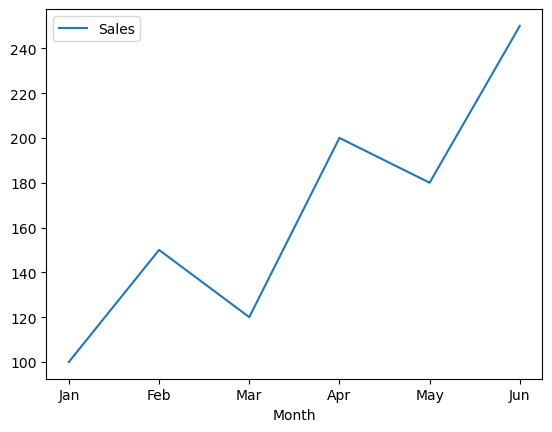

In [10]:
# 折线图
data.plot(x='Month', y='Sales', kind='line')


::: {.callout-tip}
虽然pandas也可以画图，但是还是静态图形，之后我们会详细说明更加简洁和酷炫的可视化库 [Plotly库](https://plotly.com/python/)
:::

### 数据建模和分析
Pandas还支持数据建模和分析的操作。你可以使用Pandas进行数据建模、特征工程、数据预处理等，然后将数据传递给机器学习库（如Scikit-learn）进行模型训练和预测。网上看到不错的[数据预测案例](https://developer.aliyun.com/article/1194015)

## 如何导入/导出表格数据(xsl,csv,txt...) {.unnumbered}

![](./img/rw.png)

### 读取本地数据
获取数据```data.csv```[下载地址](https://www.w3schools.com/python/pandas/data.csv)，将csv文件下载到本地。


In [1]:
# 导入pandas包
import pandas as pd

# 注意csv文件路径
df = pd.read_csv('./example_data/data.csv') 

# 打印前五个
print(df.head()) 

   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0


### 读取线上数据
线上[数据地址](https://www.w3schools.com/python/pandas/data.csv.txt)

In [14]:
df = pd.read_csv('https://www.w3schools.com/python/pandas/data.csv.txt')

# 打印前五个
print(df.head()) 

   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0


## 如何在DataFrame中选取数据？{.unnumbered}

在数据分析中，选取需要的数据进行处理和分析是很重要的。在Excel中，主要通过鼠标点选或拖拽来选取数据。

而在pandas中，我们也可以通过行列名、索引以及各种条件来筛选感兴趣的数据子集，并进行数据过滤、筛选、切片、分析和连接等操作。

In [9]:
# 获取案例数据
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv') 
print(df.head(1)) 

   PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S  


::: {.callout-note}
本教程使用存储为 CSV 格式的泰坦尼克号数据集。以下是详细说明（改成折叠！！！！！）

PassengerId：每位乘客的Id。

Survived：指示乘客是否幸存。0是和1否。

Pclass：3 个机票类别之一：Class 1、Class2和 Class 3。

Name：乘客姓名。

Sex：乘客的性别。

Age：乘客的年龄。

SibSp：船上兄弟姐妹或配偶的数量。

Parch：船上父母或孩子的人数。

Ticket：旅客的客票号。

Fare：表示票价。

Cabin：乘客的客舱号。

Embarked：登船的港口。
:::

### 选取特定列

通过列索引标签或以属性的方式可以单独获取 DataFrame的列数据，返回的数据为 Series结构。

假如我想知道每位乘客的姓名id（选取单列），```df```为数据表格，```Name```为列名


In [11]:
# 方法一：
df['Name']

# 方法二：
df.Name

# 方法三：
df.loc[:, 'Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

假如我想知道所有乘客的幸存情况（获取多列），我们可以通过两个中括号，可以获取多个列的数据。

In [16]:
df[['Name','Survived']].head()

,Name,Survived
0,"Braund, Mr. Owen Harris",0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,"Allen, Mr. William Henry",0


::: {.callout-tip}
内部方括号定义了一个 带有列名的[Python列表](https://docs.python.org/3/tutorial/datastructures.html#tut-morelists)，而外部方括号用于从 pandas 中选择数据
:::


### 选取特定行
通过行索引获取行数据，冒号指定范围

假设想知道第三行，Laina小姐的信息（单行）


In [27]:
# 选取从第二行到第三行到数据
df[2:3]

# df[2:5] 选取从第三行到第五行到数据

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S


如果我不想按顺序这样选取多行数据呢？

如果想获取单独的几行，通过loc和iloc方法 来获取第二行Laina和第五行William的信息

::: {.callout-warning}
注意在pandas中第0行才是第一行，所以切片要-1
:::


In [26]:
# iloc方法是按行索引位置选取数据，索引就是表格最左边的数字
df.iloc[[2,4]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [32]:
# loc方法是按行索引标签选取数据，因为这里索引的标签和位置相同，所以结果同上
df.loc[[2,4]]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


### 根据条件筛选行列

假设我想知道十八岁以下的乘客信息

In [37]:
df[df["Age"] < 18].head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


::: {.callout-note}
从里到外来拆解，首先需要先确定```"Age"```列，然后使用运算符```>```，选取十八岁以下的乘客。然后把这两操作在用方括号框起来，表明在数据```df```中操作，```.head()```选取前五行。
:::

## 更好的数据可视化(Plotly) {.unnumbered}
前面我们有展示pandas自带的可视化效果，其实和```matplotlib```一样都是静态的图表（略显呆板...）

这边我们极力推荐使用plotly.express，只需几行代码就可以实现酷炫交互式可视化。

::: {.panel-tabset}
## pip安装

```{python}
$ pip install plotly
```

## conda安装

```{python}
$ conda install -c plotly plotly
```

::: 



plotly.express是plotly的简化包，只需要1～2行就可以生成可视化图表，大家可以滑动鼠标，获取相对应的数据。

In [45]:
# 可生成html进行展示
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.write_html('first_figure.html', auto_open=True)

In [44]:
# plotly离线版
import plotly.offline as py
py.init_notebook_mode(connected=True)
x1 = [1, 2, 3, 5, 6]
y1 = [1, 4.5, 7, 24, 38]
trace1 = dict(x=x1, y=y1)
data = [trace1]
py.iplot(data)